## Updated Clean Version of the Model Code


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HRData.csv")


In [4]:
df.head(3)

,EmployeeID,EmployeeName,Salary,Position,State,DateOfBirth,Gender,MaritalStatus,HiringDate,TerminationDate,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmployeeSatisfaction
0,1,John Smith,62506,Production Technician I,MA,07/10/83,M,Single,7/5/2011,NaN,Active,Production,LinkedIn,Exceeds,4.60,5
1,2,Sarah Johnson,104437,Sr. DBA,MA,05/05/75,M,Married,3/30/2015,6/16/2016,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3
2,3,Michael Williams,64955,Production Technician II,MA,09/19/88,F,Married,7/5/2011,9/24/2012,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3


## Drop irrelevant or unstructured columns

In [5]:
df.drop(columns=["EmployeeID", "EmployeeName", "DateOfBirth", "HiringDate", "TerminationDate"], inplace=True)

In [6]:
df.head(4)

,Salary,Position,State,Gender,MaritalStatus,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmployeeSatisfaction
0,62506,Production Technician I,MA,M,Single,Active,Production,LinkedIn,Exceeds,4.60,5
1,104437,Sr. DBA,MA,M,Married,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3
2,64955,Production Technician II,MA,F,Married,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3
3,64991,Production Technician I,MA,F,Married,Active,Production,Indeed,Fully Meets,4.84,5


## Create Attrition column

In [7]:

df["Attrition"] = df["EmploymentStatus"].apply(lambda x: 0 if x == "Active" else 1)
df.drop(columns=["EmploymentStatus"], inplace=True)

In [8]:

le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

##  Split features and target

In [9]:

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Decision Tree model


In [10]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Predict and evaluate

In [11]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75        41
           1       0.45      0.23      0.30        22

    accuracy                           0.63        63
   macro avg       0.56      0.54      0.53        63
weighted avg       0.60      0.63      0.60        63



## model Accuracy Report

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        41
           1       0.45      0.23      0.30        22

    accuracy                           0.63        63
   macro avg       0.56      0.54      0.53        63
weighted avg       0.60      0.63      0.60        63



## Confusion Matrix

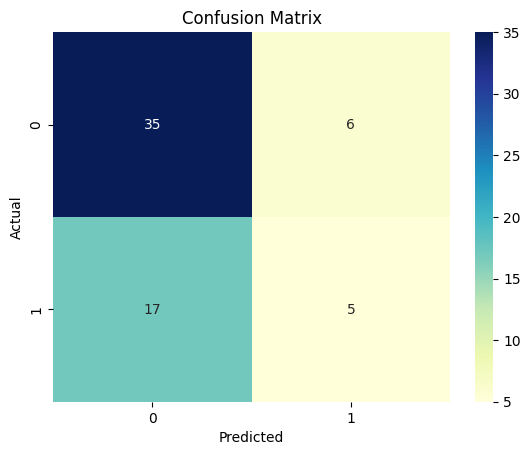

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()